In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [29]:

Iris = pd.read_csv('IRIS.csv')

In [30]:
### exploring the dataset
Iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [31]:

Iris.shape

(150, 5)

In [32]:

Iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [33]:

Iris.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [34]:

Iris.drop_duplicates(inplace=True)

In [35]:

Iris.drop_duplicates(inplace=True)

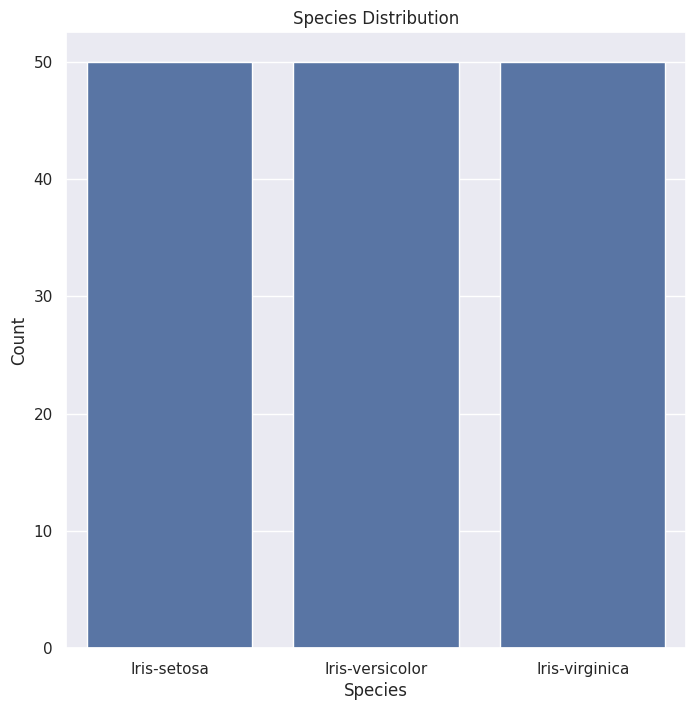

In [36]:

sns.set(style="darkgrid")
plt.figure(figsize=(8, 8))

sns.countplot(x='species',data=iris)

plt.title("Species Distribution")
plt.xlabel("Species")
plt.ylabel("Count")

plt.show()

In [37]:

print(Iris['species'].value_counts())

species
Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: count, dtype: int64


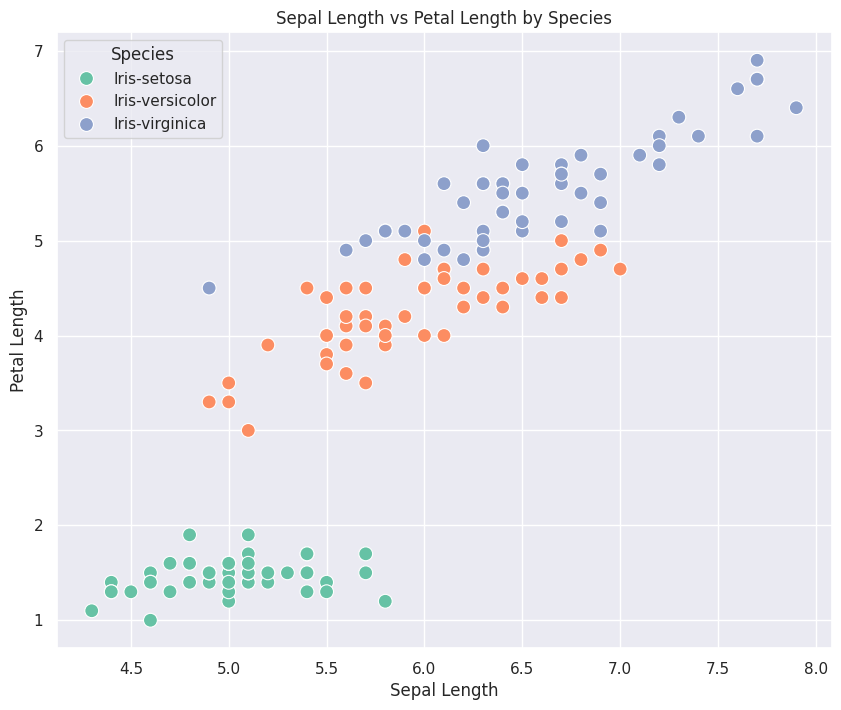

In [38]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 8))

sns.scatterplot(x="sepal_length", y="petal_length", hue="species", data=iris, palette="Set2", s=100)

plt.title("Sepal Length vs Petal Length by Species")
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend(title="Species")

plt.show()

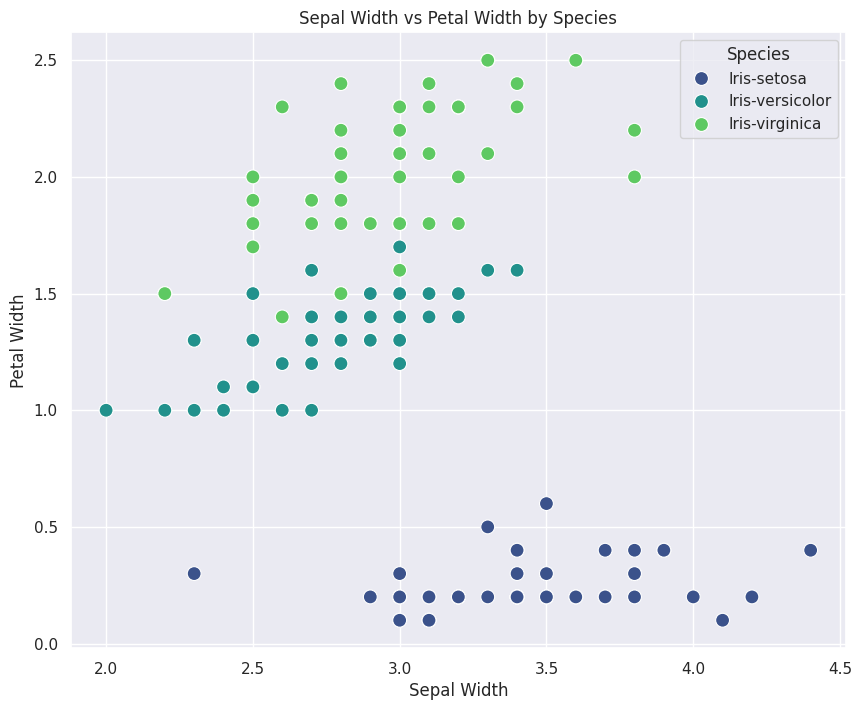

In [39]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 8))

sns.scatterplot(x="sepal_width", y="petal_width", hue="species", data=iris, palette="viridis", s=100)

plt.title("Sepal Width vs Petal Width by Species")
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend(title="Species")

plt.show()

In [40]:
from sklearn.preprocessing import LabelEncoder


In [41]:
label = LabelEncoder()
Iris['species'] = label.fit_transform(Iris['species'])
Iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [42]:

X = iris.drop("species", axis=1)
y = iris["species"]

In [43]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [45]:

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [46]:
y_pred = knn_model.predict(X_test_scaled)

In [47]:

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


In [48]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [49]:

def predict_species(sepal_length, sepal_width, petal_length, petal_width):
    model = knn_model
    new_data = [[sepal_length, sepal_width, petal_length, petal_width]]
    prediction = model.predict(new_data)
    return prediction[0]

In [50]:

predict_species(4.5, 3.5, 2.0, 0.9)

'Iris-virginica'